In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from reComBat import reComBat


In [2]:
#technology = "microarray" # "RNAseq"
technology = "RNAseq" #microarray

In [3]:

# Assuming your DataFrame is called cts and has gene expression data
# Assuming cts is a pandas DataFrame with gene expression data
if technology == "microarray":
    cts = pd.read_csv("/home/karen/Documents/phd/Data/trainign_dataset_51270_microarray_unadjusted.csv")
elif technology == "RNAseq":
    cts = pd.read_csv("/home/karen/Documents/GitHub/Test_DEG_methods-single_cell/batch_correction/RNAseq_All_abundances_unadjusted.csv")

metadata =   cts[["Experiment", "Sample", "Age"]]


In [4]:
metadata

,Experiment,Sample,Age
0,GSE164471,SRR13388732,23.0
1,GSE164471,SRR13388733,28.0
2,GSE164471,SRR13388734,31.0
3,GSE164471,SRR13388735,31.0
4,GSE164471,SRR13388736,35.0
...,...,...,...
265,GSE129643,SRR8882198,27.0
266,GSE129643,SRR8882200,33.0
267,GSE129643,SRR8882202,37.0
268,GSE129643,SRR8882203,38.0


# Function

In [5]:
import matplotlib.pyplot as plt

def generate_colors(n):
        colormap = plt.cm.get_cmap('tab20', n)
        colors = [colormap(i) for i in range(n)]
        return colors
    
def blot_expression(subset_data, experiments, count_experiments, colors=None, title=None, save=False):
    
    if colors is None:
        colors = generate_colors(len(experiments))
    colored = np.sum(list(count_experiments.values()))
    if len(subset_data.columns) != colored:
        raise "the columns and the experiments should be same length"
        return None
    if len(count_experiments) != len(experiments):
        raise "the count_experiments and the experiments should be same length"
        return None
    if title is None:
        title = 'Expression of Gene Expression Across Experiments'
    boxes=[]
    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(10, 6))
    start_c = 0
    end_c = len(subset_data.columns)
    color_i = 0
    for exp in experiments:
        end_c=start_c + count_experiments[exp]
        # Boxplot for the first 84 columns
        box= ax.boxplot(subset_data.iloc[:, start_c:end_c], positions=list(range(start_c+1,end_c+1)), showfliers=False, patch_artist=True,
                          boxprops=dict(facecolor=colors[color_i], color=colors[color_i])
                          )
        start_c = end_c
        boxes.append(box)
        color_i=color_i+1
                          
    
    # Set labels and titles
    ax.set_title(title)
    ax.set_ylabel('Expression')
    
    # Adjust legend
    legends_list = [b["boxes"][0] for b in boxes]
    ax.legend(legends_list, experiments)
    
    plt.tight_layout()
    if save:
        plt.savefig(save)
    plt.show()


In [6]:
cts

,Sample,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.11,...,ENSG00000285472.1,ENSG00000285476.1,ENSG00000285480.1,ENSG00000285491.1,ENSG00000285505.1,ENSG00000285508.1,ENSG00000285509.1,Experiment,Age,Sample.1
0,SRR13388732,3.346531,0.000000,7.023940,0.705439,3.879328,0.275243,7.746350,6.574690,8.136232,...,0.311412,0.439481,0.000000,0.000000,0.000000,4.61464,0.142626,GSE164471,23.0,SRR13388732
1,SRR13388733,7.351350,0.000000,13.916237,4.891812,2.885359,0.190321,16.006573,6.498180,10.725815,...,0.000000,0.000000,0.000000,0.000000,0.000000,13.80200,1.119540,GSE164471,28.0,SRR13388733
2,SRR13388734,7.671751,1.624510,18.720030,3.338030,9.629021,0.204143,19.061782,7.368540,11.420381,...,0.000000,0.167163,0.000000,0.418267,0.000000,2.37204,0.915094,GSE164471,31.0,SRR13388734
3,SRR13388735,2.547355,0.184514,6.876067,0.888782,1.684829,0.000000,3.182537,2.415355,2.242850,...,0.000000,0.148800,0.000000,0.000000,0.000000,5.20632,0.813373,GSE164471,31.0,SRR13388735
4,SRR13388736,15.728966,0.613411,14.120093,3.123864,10.457990,0.198544,12.340000,19.441760,18.223213,...,1.544910,1.069550,0.379249,0.000000,0.000000,3.39066,0.707502,GSE164471,35.0,SRR13388736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,SRR8882198,1.832683,0.000000,2.567454,0.617939,1.599221,0.338734,2.457767,1.825564,5.485286,...,0.043890,0.109543,0.131619,0.115910,0.023606,1.51306,0.347812,GSE129643,27.0,SRR8882198
266,SRR8882200,2.251713,0.000000,2.120141,0.895718,2.379145,0.418938,1.489740,2.676330,1.880811,...,0.000000,0.156295,0.000000,0.078959,0.000000,1.51426,0.129535,GSE129643,33.0,SRR8882200
267,SRR8882202,1.387888,0.057285,5.080017,1.439485,1.263484,0.194929,3.880208,2.066827,5.226251,...,0.000000,0.000000,0.090303,0.000000,0.000000,2.29948,0.106928,GSE129643,37.0,SRR8882202
268,SRR8882203,1.048829,0.000000,3.248294,1.789166,0.405673,0.152905,2.071356,1.466217,3.389388,...,0.000000,0.057207,0.000000,0.000000,0.000295,2.80874,0.115525,GSE129643,38.0,SRR8882203


In [7]:
sample_order = cts["Sample"].tolist()  # Get the order of samples in cts
experiment_order = cts["Experiment"].tolist() 
age_order = cts["Age"].tolist()


In [8]:
df =pd.DataFrame(experiment_order)
count_experiments = dict(df[0].value_counts())
count_experiments
experiments = list(count_experiments)
experiments

['GSE157585', 'GSE167186', 'GSE164471', 'GSE60590', 'GSE129643', 'GSE152558']

In [9]:
def map_to_category(age):
    if age <= 35:
        return "Young"
    elif age > 65:
        return "Old"
    else:
        return "MiddleAge"

# Map values in age_order to categories
age_order = [map_to_category(age) for age in age_order]

In [10]:
cts

,Sample,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.11,...,ENSG00000285472.1,ENSG00000285476.1,ENSG00000285480.1,ENSG00000285491.1,ENSG00000285505.1,ENSG00000285508.1,ENSG00000285509.1,Experiment,Age,Sample.1
0,SRR13388732,3.346531,0.000000,7.023940,0.705439,3.879328,0.275243,7.746350,6.574690,8.136232,...,0.311412,0.439481,0.000000,0.000000,0.000000,4.61464,0.142626,GSE164471,23.0,SRR13388732
1,SRR13388733,7.351350,0.000000,13.916237,4.891812,2.885359,0.190321,16.006573,6.498180,10.725815,...,0.000000,0.000000,0.000000,0.000000,0.000000,13.80200,1.119540,GSE164471,28.0,SRR13388733
2,SRR13388734,7.671751,1.624510,18.720030,3.338030,9.629021,0.204143,19.061782,7.368540,11.420381,...,0.000000,0.167163,0.000000,0.418267,0.000000,2.37204,0.915094,GSE164471,31.0,SRR13388734
3,SRR13388735,2.547355,0.184514,6.876067,0.888782,1.684829,0.000000,3.182537,2.415355,2.242850,...,0.000000,0.148800,0.000000,0.000000,0.000000,5.20632,0.813373,GSE164471,31.0,SRR13388735
4,SRR13388736,15.728966,0.613411,14.120093,3.123864,10.457990,0.198544,12.340000,19.441760,18.223213,...,1.544910,1.069550,0.379249,0.000000,0.000000,3.39066,0.707502,GSE164471,35.0,SRR13388736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,SRR8882198,1.832683,0.000000,2.567454,0.617939,1.599221,0.338734,2.457767,1.825564,5.485286,...,0.043890,0.109543,0.131619,0.115910,0.023606,1.51306,0.347812,GSE129643,27.0,SRR8882198
266,SRR8882200,2.251713,0.000000,2.120141,0.895718,2.379145,0.418938,1.489740,2.676330,1.880811,...,0.000000,0.156295,0.000000,0.078959,0.000000,1.51426,0.129535,GSE129643,33.0,SRR8882200
267,SRR8882202,1.387888,0.057285,5.080017,1.439485,1.263484,0.194929,3.880208,2.066827,5.226251,...,0.000000,0.000000,0.090303,0.000000,0.000000,2.29948,0.106928,GSE129643,37.0,SRR8882202
268,SRR8882203,1.048829,0.000000,3.248294,1.789166,0.405673,0.152905,2.071356,1.466217,3.389388,...,0.000000,0.057207,0.000000,0.000000,0.000295,2.80874,0.115525,GSE129643,38.0,SRR8882203


In [11]:



cts_processed = cts.copy()

if technology == "microarray":
    cts_processed.drop(['Age', 'Sex', 'Status', 'Experiment'], axis=1, inplace=True)
elif technology == "RNAseq":
    cts_processed.drop(['Age', 'Sample.1', 'Experiment'], axis=1, inplace=True)

samples=cts_processed["Sample"]
cts_processed.set_index("Sample",  inplace=True)
gene_columns= cts_processed.columns


In [12]:
data = cts_processed.T
data

Sample,SRR13388732,SRR13388733,SRR13388734,SRR13388735,SRR13388736,SRR13388737,SRR13388738,SRR13388739,SRR13388740,SRR13388741,...,SRR8882190,SRR8882191,SRR8882192,SRR8882195,SRR8882196,SRR8882198,SRR8882200,SRR8882202,SRR8882203,SRR8882219
ENSG00000000003.14,3.346531,7.351350,7.671751,2.547355,15.728966,2.841494,5.193670,4.153453,4.300594,4.459110,...,13.848931,3.564186,3.274745,2.238637,3.150603,1.832683,2.251713,1.387888,1.048829,2.151968
ENSG00000000005.5,0.000000,0.000000,1.624510,0.184514,0.613411,0.000000,0.000000,0.000000,0.000000,0.543264,...,0.662343,0.000000,0.735241,0.000000,0.249809,0.000000,0.000000,0.057285,0.000000,0.596399
ENSG00000000419.12,7.023940,13.916237,18.720030,6.876067,14.120093,7.675674,19.809370,9.133720,12.253240,12.219568,...,4.632428,13.652944,9.308650,5.111828,6.741798,2.567454,2.120141,5.080017,3.248294,5.567121
ENSG00000000457.13,0.705439,4.891812,3.338030,0.888782,3.123864,0.895387,4.355390,1.706076,4.021705,2.631625,...,4.156385,2.069441,2.928315,2.342587,1.243943,0.617939,0.895718,1.439485,1.789166,2.209411
ENSG00000000460.16,3.879328,2.885359,9.629021,1.684829,10.457990,3.117501,4.168048,2.193944,5.262607,7.334530,...,23.378650,4.354851,3.887155,2.090256,2.319032,1.599221,2.379145,1.263484,0.405673,3.183493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000285480.1,0.000000,0.000000,0.000000,0.000000,0.379249,0.816663,2.316580,0.000000,0.000000,0.000000,...,0.000000,0.264335,1.647620,0.000000,0.000000,0.131619,0.000000,0.090303,0.000000,0.000000
ENSG00000285491.1,0.000000,0.000000,0.418267,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.120990,0.000000,0.000000,0.000000,0.000000,0.115910,0.078959,0.000000,0.000000,0.625065
ENSG00000285505.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.054416,0.000000,0.000000,0.000000,0.023606,0.000000,0.000000,0.000295,0.079723
ENSG00000285508.1,4.614640,13.802000,2.372040,5.206320,3.390660,5.519160,0.000000,1.975900,4.651560,3.598880,...,1.806360,2.594540,1.859600,1.281800,0.188396,1.513060,1.514260,2.299480,2.808740,0.000000


In [13]:
cts_processed.columns

Index(['ENSG00000000003.14', 'ENSG00000000005.5', 'ENSG00000000419.12',
       'ENSG00000000457.13', 'ENSG00000000460.16', 'ENSG00000000938.12',
       'ENSG00000000971.15', 'ENSG00000001036.13', 'ENSG00000001084.11',
       'ENSG00000001167.14',
       ...
       'ENSG00000285458.1', 'ENSG00000285470.1', 'ENSG00000285471.1',
       'ENSG00000285472.1', 'ENSG00000285476.1', 'ENSG00000285480.1',
       'ENSG00000285491.1', 'ENSG00000285505.1', 'ENSG00000285508.1',
       'ENSG00000285509.1'],
      dtype='object', length=34505)

In [14]:
#!pip install combat

In [15]:
experiment_order= pd.Series(experiment_order)


In [16]:
experiment_order

0      GSE164471
1      GSE164471
2      GSE164471
3      GSE164471
4      GSE164471
         ...    
265    GSE129643
266    GSE129643
267    GSE129643
268    GSE129643
269    GSE129643
Length: 270, dtype: object

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cts_processed = scaler.fit_transform(cts_processed.T)

In [18]:
cts_processed=pd.DataFrame(cts_processed, columns=samples)


In [19]:

data = (data - data.mean()) / data.std()

data.fillna(0, inplace=True)

In [20]:
data


Sample,SRR13388732,SRR13388733,SRR13388734,SRR13388735,SRR13388736,SRR13388737,SRR13388738,SRR13388739,SRR13388740,SRR13388741,...,SRR8882190,SRR8882191,SRR8882192,SRR8882195,SRR8882196,SRR8882198,SRR8882200,SRR8882202,SRR8882203,SRR8882219
ENSG00000000003.14,-0.019945,-0.021474,-0.027244,-0.015458,-0.012505,-0.021658,-0.020410,-0.018321,-0.029712,-0.023722,...,-0.013540,-0.020061,-0.024260,-0.012577,-0.012732,-0.014899,-0.012002,-0.013633,-0.012044,-0.014223
ENSG00000000005.5,-0.022699,-0.030376,-0.036875,-0.016925,-0.032016,-0.024174,-0.025551,-0.021723,-0.036062,-0.028005,...,-0.026891,-0.023140,-0.026934,-0.013698,-0.014245,-0.015944,-0.013044,-0.014339,-0.012521,-0.015102
ENSG00000000419.12,-0.016919,-0.013524,-0.009650,-0.012769,-0.014582,-0.017378,-0.005941,-0.014242,-0.017971,-0.015232,...,-0.022871,-0.011344,-0.017907,-0.011138,-0.010860,-0.014480,-0.012063,-0.011673,-0.011044,-0.012294
ENSG00000000457.13,-0.022119,-0.024452,-0.034146,-0.016488,-0.028775,-0.023381,-0.021239,-0.020325,-0.030124,-0.025721,...,-0.023353,-0.021352,-0.024625,-0.012525,-0.013726,-0.015592,-0.012630,-0.013605,-0.011708,-0.014191
ENSG00000000460.16,-0.019507,-0.026882,-0.024127,-0.015993,-0.019309,-0.021414,-0.021425,-0.019926,-0.028292,-0.020576,...,-0.003892,-0.019378,-0.023615,-0.012651,-0.013166,-0.015032,-0.011943,-0.013699,-0.012337,-0.013641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000285480.1,-0.022699,-0.030376,-0.039462,-0.017040,-0.032318,-0.023451,-0.023258,-0.021723,-0.036062,-0.028600,...,-0.027561,-0.022912,-0.025973,-0.013698,-0.014375,-0.015869,-0.013044,-0.014321,-0.012521,-0.015439
ENSG00000285491.1,-0.022699,-0.030376,-0.038796,-0.017040,-0.032808,-0.024174,-0.025551,-0.021723,-0.036062,-0.028600,...,-0.026426,-0.023140,-0.027708,-0.013698,-0.014375,-0.015878,-0.013008,-0.014369,-0.012521,-0.015086
ENSG00000285505.1,-0.022699,-0.030376,-0.039462,-0.017040,-0.032808,-0.024174,-0.025551,-0.021723,-0.036062,-0.028600,...,-0.027561,-0.023093,-0.027708,-0.013698,-0.014375,-0.015931,-0.013044,-0.014369,-0.012521,-0.015394
ENSG00000285508.1,-0.018902,-0.013662,-0.035684,-0.013806,-0.028431,-0.019287,-0.025551,-0.020104,-0.029194,-0.024663,...,-0.025732,-0.020898,-0.025750,-0.013056,-0.014277,-0.015081,-0.012343,-0.013149,-0.011244,-0.015439


In [21]:
cts_processed.index=gene_columns
cts_processed=cts_processed.T
cts_processed

,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.11,ENSG00000001167.14,...,ENSG00000285458.1,ENSG00000285470.1,ENSG00000285471.1,ENSG00000285472.1,ENSG00000285476.1,ENSG00000285480.1,ENSG00000285491.1,ENSG00000285505.1,ENSG00000285508.1,ENSG00000285509.1
Sample,,,,,,,,,,,,,,,,,,,,,
SRR13388732,-0.019946,-0.022699,-0.016920,-0.022119,-0.019507,-0.022473,-0.016325,-0.017289,-0.016004,-0.020094,...,-0.014371,-0.022586,-0.022566,-0.022443,-0.022338,-0.022699,-0.022699,-0.022699,-0.018902,-0.022582
SRR13388733,-0.021474,-0.030377,-0.013524,-0.024453,-0.026883,-0.030146,-0.010993,-0.022507,-0.017388,-0.021240,...,-0.023757,-0.030377,-0.030377,-0.030377,-0.030377,-0.030377,-0.030377,-0.030377,-0.013662,-0.029021
SRR13388734,-0.027245,-0.036875,-0.009650,-0.034146,-0.024128,-0.039137,-0.009106,-0.027728,-0.021275,-0.028630,...,-0.007025,-0.039136,-0.037170,-0.039462,-0.039196,-0.039462,-0.038796,-0.039462,-0.035685,-0.038005
SRR13388735,-0.015458,-0.016925,-0.012770,-0.016488,-0.015994,-0.017040,-0.015063,-0.015540,-0.015647,-0.015850,...,-0.015022,-0.017040,-0.017040,-0.017040,-0.016947,-0.017040,-0.017040,-0.017040,-0.013807,-0.016535
SRR13388736,-0.012505,-0.032016,-0.014582,-0.028776,-0.019309,-0.032552,-0.016880,-0.007713,-0.009286,-0.027998,...,0.007950,-0.032808,-0.031510,-0.030814,-0.031427,-0.032318,-0.032808,-0.032808,-0.028431,-0.031895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR8882198,-0.014899,-0.015944,-0.014480,-0.015592,-0.015032,-0.015751,-0.014542,-0.014903,-0.012815,-0.014459,...,-0.014207,-0.015944,-0.015944,-0.015919,-0.015882,-0.015869,-0.015878,-0.015931,-0.015081,-0.015746
SRR8882200,-0.012002,-0.013044,-0.012063,-0.012630,-0.011943,-0.012850,-0.012355,-0.011806,-0.012174,-0.012737,...,-0.012086,-0.013013,-0.013017,-0.013044,-0.012972,-0.013044,-0.013008,-0.013044,-0.012343,-0.012984
SRR8882202,-0.013633,-0.014339,-0.011673,-0.013605,-0.013699,-0.014266,-0.012310,-0.013272,-0.011596,-0.012803,...,-0.013884,-0.014369,-0.014369,-0.014369,-0.014369,-0.014321,-0.014369,-0.014369,-0.013149,-0.014313


In [22]:
cts_processed.fillna(0, inplace=True)

In [23]:
combat = reComBat()
combat.fit(cts_processed,experiment_order)
data_corrected = combat.transform(cts_processed,experiment_order)

[reComBat] 2024-05-13 12:12:48,725 Starting to fot reComBat.
[reComBat] 2024-05-13 12:12:48,738 Fit the linear model.
[reComBat] 2024-05-13 12:12:50,468 Starting the empirical parametric optimisation.
[reComBat] 2024-05-13 12:12:50,824 Optimisation finished.
[reComBat] 2024-05-13 12:12:50,824 reComBat is fitted.
[reComBat] 2024-05-13 12:12:50,829 Starting to transform.
[reComBat] 2024-05-13 12:12:51,867 Transform finished.


In [24]:
data_corrected.index



Index(['SRR13388732', 'SRR13388733', 'SRR13388734', 'SRR13388735',
       'SRR13388736', 'SRR13388737', 'SRR13388738', 'SRR13388739',
       'SRR13388740', 'SRR13388741',
       ...
       'SRR8882190', 'SRR8882191', 'SRR8882192', 'SRR8882195', 'SRR8882196',
       'SRR8882198', 'SRR8882200', 'SRR8882202', 'SRR8882203', 'SRR8882219'],
      dtype='object', name='Sample', length=270)

In [25]:
metadata.columns

Index(['Experiment', 'Sample', 'Age'], dtype='object')

In [26]:
colors=['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'white', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive']

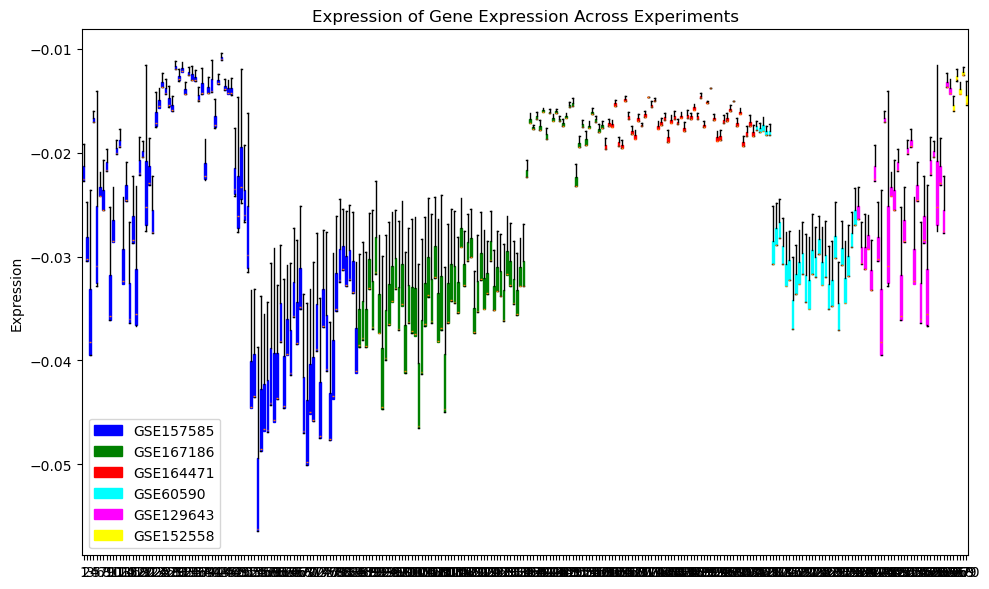

In [27]:

blot_expression(data, experiments, count_experiments, colors=colors, save=f"/home/karen/Documents/phd/Plots/expression_distribution_{technology}_unalteraded__reCombat.png")



In [28]:
# with standar norm
data_corrected

,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.11,ENSG00000001167.14,...,ENSG00000285458.1,ENSG00000285470.1,ENSG00000285471.1,ENSG00000285472.1,ENSG00000285476.1,ENSG00000285480.1,ENSG00000285491.1,ENSG00000285505.1,ENSG00000285508.1,ENSG00000285509.1
Sample,,,,,,,,,,,,,,,,,,,,,
SRR13388732,-0.013507,-0.008613,-0.015782,-0.012606,-0.012512,-0.007849,-0.009428,-0.005869,-0.016109,-0.014609,...,-0.003492,-0.007466,-0.008219,-0.007194,-0.007289,-0.008221,-0.008135,-0.007838,-0.001515,-0.009050
SRR13388733,-0.020727,-0.036766,0.000817,-0.021617,-0.047792,-0.035041,0.016555,-0.029716,-0.023414,-0.020019,...,-0.045883,-0.035540,-0.036993,-0.035938,-0.036635,-0.035216,-0.035962,-0.035459,0.019047,-0.032990
SRR13388734,-0.047985,-0.060597,0.019755,-0.059044,-0.034614,-0.066902,0.025750,-0.053573,-0.043942,-0.054922,...,0.029681,-0.067106,-0.062021,-0.068856,-0.068829,-0.067163,-0.066478,-0.068147,-0.067372,-0.066392
SRR13388735,0.007692,0.012561,0.004505,0.009135,0.004295,0.011404,-0.003279,0.002127,-0.014221,0.005435,...,-0.006434,0.012519,0.012142,0.012383,0.012388,0.011679,0.012378,0.012524,0.018481,0.013433
SRR13388736,0.021639,-0.042779,-0.004353,-0.038308,-0.011563,-0.043566,-0.012129,0.037899,0.019374,-0.051937,...,0.097308,-0.044302,-0.041170,-0.037522,-0.040471,-0.042044,-0.044774,-0.044207,-0.038909,-0.043675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR8882198,0.018746,0.028362,-0.000611,0.024016,0.017854,0.027669,0.003543,0.011436,0.004030,0.022221,...,0.000667,0.028571,0.028444,0.028495,0.028305,0.027367,0.028665,0.028594,0.022648,0.028368
SRR8882200,0.031651,0.038879,0.010388,0.035441,0.031588,0.037807,0.013077,0.024175,0.007002,0.030308,...,0.008513,0.038995,0.039133,0.038768,0.038781,0.037155,0.038927,0.038838,0.032826,0.038477
SRR8882202,0.024387,0.034184,0.012162,0.031678,0.023782,0.032860,0.013272,0.018142,0.009680,0.030001,...,0.001861,0.034172,0.034194,0.034033,0.033751,0.032730,0.034059,0.034136,0.029831,0.033615


In [29]:
# with the manual one
data_corrected

,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.11,ENSG00000001167.14,...,ENSG00000285458.1,ENSG00000285470.1,ENSG00000285471.1,ENSG00000285472.1,ENSG00000285476.1,ENSG00000285480.1,ENSG00000285491.1,ENSG00000285505.1,ENSG00000285508.1,ENSG00000285509.1
Sample,,,,,,,,,,,,,,,,,,,,,
SRR13388732,-0.013507,-0.008613,-0.015782,-0.012606,-0.012512,-0.007849,-0.009428,-0.005869,-0.016109,-0.014609,...,-0.003492,-0.007466,-0.008219,-0.007194,-0.007289,-0.008221,-0.008135,-0.007838,-0.001515,-0.009050
SRR13388733,-0.020727,-0.036766,0.000817,-0.021617,-0.047792,-0.035041,0.016555,-0.029716,-0.023414,-0.020019,...,-0.045883,-0.035540,-0.036993,-0.035938,-0.036635,-0.035216,-0.035962,-0.035459,0.019047,-0.032990
SRR13388734,-0.047985,-0.060597,0.019755,-0.059044,-0.034614,-0.066902,0.025750,-0.053573,-0.043942,-0.054922,...,0.029681,-0.067106,-0.062021,-0.068856,-0.068829,-0.067163,-0.066478,-0.068147,-0.067372,-0.066392
SRR13388735,0.007692,0.012561,0.004505,0.009135,0.004295,0.011404,-0.003279,0.002127,-0.014221,0.005435,...,-0.006434,0.012519,0.012142,0.012383,0.012388,0.011679,0.012378,0.012524,0.018481,0.013433
SRR13388736,0.021639,-0.042779,-0.004353,-0.038308,-0.011563,-0.043566,-0.012129,0.037899,0.019374,-0.051937,...,0.097308,-0.044302,-0.041170,-0.037522,-0.040471,-0.042044,-0.044774,-0.044207,-0.038909,-0.043675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR8882198,0.018746,0.028362,-0.000611,0.024016,0.017854,0.027669,0.003543,0.011436,0.004030,0.022221,...,0.000667,0.028571,0.028444,0.028495,0.028305,0.027367,0.028665,0.028594,0.022648,0.028368
SRR8882200,0.031651,0.038879,0.010388,0.035441,0.031588,0.037807,0.013077,0.024175,0.007002,0.030308,...,0.008513,0.038995,0.039133,0.038768,0.038781,0.037155,0.038927,0.038838,0.032826,0.038477
SRR8882202,0.024387,0.034184,0.012162,0.031678,0.023782,0.032860,0.013272,0.018142,0.009680,0.030001,...,0.001861,0.034172,0.034194,0.034033,0.033751,0.032730,0.034059,0.034136,0.029831,0.033615


In [30]:
data_corrected = data_corrected.T

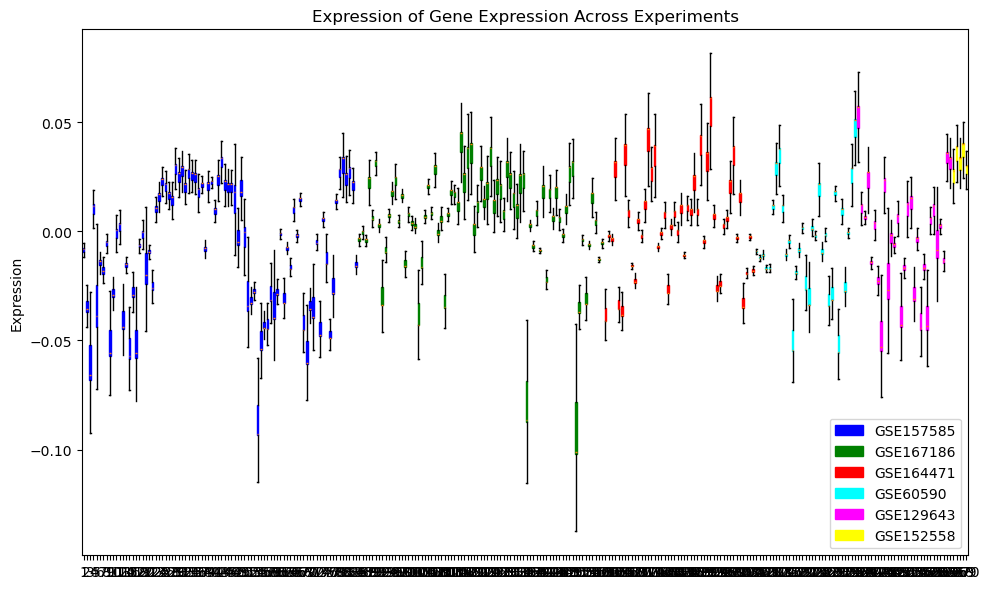

In [31]:
blot_expression(data_corrected, experiments, count_experiments, colors=colors, save=f"/home/karen/Documents/phd/Plots/expression_distribution_{technology}_adjusted_reCombat.png")

In [32]:
data_corrected = data_corrected.T


In [33]:
#blot_expression(data_corrected, experiments, count_experiments, colors=["blue", "green", "orange", "pink","red","purple"])

# Testing batch correction

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Set significance threshold (alpha level)

def plot_batch_correction_p_values(p_values_before, p_values_after, alpha = 0.05):
    # Plot histograms of p-values before and after batch correction
    plt.figure(figsize=(10, 5))
    plt.hist(p_values_before, bins=50, color='blue', alpha=0.5, label='Before Correction')
    plt.hist(p_values_after, bins=50, color='green', alpha=0.5, label='After Correction')
    plt.axvline(alpha, color='red', linestyle='--', label='Significance Threshold')
    plt.xlabel('p-value')
    plt.ylabel('Frequency')
    plt.title('Distribution of p-values before and after batch correction')
    plt.legend()
    plt.show()
    
    # Perform Kolmogorov-Smirnov test to compare distributions of p-values
    ks_stat, ks_p_value = ks_2samp(p_values_before, p_values_after)
    print("Kolmogorov-Smirnov test p-value:", ks_p_value)
    
    # Check if more p-values fall below the significance threshold after batch correction
    num_sig_before = np.sum(p_values_before < alpha)
    num_sig_after = np.sum(p_values_after < alpha)
    
    print("Number of significant p-values before correction:", num_sig_before)
    print("Number of significant p-values after correction:", num_sig_after)

def see_distribution(p_values_before, p_values_after):

    # Plot histograms of p-values before and after batch correction
    plt.figure(figsize=(10, 5))
    sns.histplot(p_values_before, bins=50, color='blue', kde=True, label='Before Correction')
    sns.histplot(p_values_after, bins=50, color='green', kde=True, label='After Correction')
    plt.axvline(alpha, color='red', linestyle='--', label='Significance Threshold')
    plt.xlabel('p-value')
    plt.ylabel('Density')
    plt.title('Distribution of p-values before and after batch correction')
    plt.legend()
    plt.show()


In [35]:
def get_ks_values_before_after(data, data_corrected, experiment_1, experiment_2):
    data_before = data.copy()
    data_before = data_before.T
    data_before.reset_index(drop=True, inplace=True)
    
    group_a_samples_before = data_before[cts['Experiment'] == experiment_1]
    group_b_samples_before = data_before[cts['Experiment'] == experiment_2]
    _, p_values_before = ttest_ind(group_a_samples_before, group_b_samples_before)
    ks_stat_before, ks_p_value_before = ks_2samp(group_a_samples_before, group_b_samples_before)

    data_corrected.reset_index(drop=True, inplace=True)

    group_a_samples_corrected = data_corrected[cts['Experiment'] == experiment_1]
    group_b_samples_corrected = data_corrected[cts['Experiment'] == experiment_2]
    _, p_values_after = ttest_ind(group_a_samples_corrected, group_b_samples_corrected)
    ks_stat_after, ks_p_value_after = ks_2samp(group_a_samples_corrected, group_b_samples_corrected)

    return ks_p_value_before, ks_p_value_after




In [36]:
def get_p_values_before_after(data, data_corrected, experiment_1, experiment_2):
    data_before = data.copy()
    data_before = data_before.T
    data_before.reset_index(drop=True, inplace=True)
    
    group_a_samples_before = data_before[cts['Experiment'] == experiment_1]
    group_b_samples_before = data_before[cts['Experiment'] == experiment_2]
    _, p_values_before = ttest_ind(group_a_samples_before, group_b_samples_before)

    data_corrected.reset_index(drop=True, inplace=True)

    group_a_samples_corrected = data_corrected[cts['Experiment'] == experiment_1]
    group_b_samples_corrected = data_corrected[cts['Experiment'] == experiment_2]
    _, p_values_after = ttest_ind(group_a_samples_corrected, group_b_samples_corrected)

    return p_values_before, p_values_after

In [37]:
experiment_list = experiments
experiments

['GSE157585', 'GSE167186', 'GSE164471', 'GSE60590', 'GSE129643', 'GSE152558']

In [38]:
experiment_1 = experiments[5]
experiment_2 = experiments[1]

In [39]:
cts_processed

,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.11,ENSG00000001167.14,...,ENSG00000285458.1,ENSG00000285470.1,ENSG00000285471.1,ENSG00000285472.1,ENSG00000285476.1,ENSG00000285480.1,ENSG00000285491.1,ENSG00000285505.1,ENSG00000285508.1,ENSG00000285509.1
Sample,,,,,,,,,,,,,,,,,,,,,
SRR13388732,-0.019946,-0.022699,-0.016920,-0.022119,-0.019507,-0.022473,-0.016325,-0.017289,-0.016004,-0.020094,...,-0.014371,-0.022586,-0.022566,-0.022443,-0.022338,-0.022699,-0.022699,-0.022699,-0.018902,-0.022582
SRR13388733,-0.021474,-0.030377,-0.013524,-0.024453,-0.026883,-0.030146,-0.010993,-0.022507,-0.017388,-0.021240,...,-0.023757,-0.030377,-0.030377,-0.030377,-0.030377,-0.030377,-0.030377,-0.030377,-0.013662,-0.029021
SRR13388734,-0.027245,-0.036875,-0.009650,-0.034146,-0.024128,-0.039137,-0.009106,-0.027728,-0.021275,-0.028630,...,-0.007025,-0.039136,-0.037170,-0.039462,-0.039196,-0.039462,-0.038796,-0.039462,-0.035685,-0.038005
SRR13388735,-0.015458,-0.016925,-0.012770,-0.016488,-0.015994,-0.017040,-0.015063,-0.015540,-0.015647,-0.015850,...,-0.015022,-0.017040,-0.017040,-0.017040,-0.016947,-0.017040,-0.017040,-0.017040,-0.013807,-0.016535
SRR13388736,-0.012505,-0.032016,-0.014582,-0.028776,-0.019309,-0.032552,-0.016880,-0.007713,-0.009286,-0.027998,...,0.007950,-0.032808,-0.031510,-0.030814,-0.031427,-0.032318,-0.032808,-0.032808,-0.028431,-0.031895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR8882198,-0.014899,-0.015944,-0.014480,-0.015592,-0.015032,-0.015751,-0.014542,-0.014903,-0.012815,-0.014459,...,-0.014207,-0.015944,-0.015944,-0.015919,-0.015882,-0.015869,-0.015878,-0.015931,-0.015081,-0.015746
SRR8882200,-0.012002,-0.013044,-0.012063,-0.012630,-0.011943,-0.012850,-0.012355,-0.011806,-0.012174,-0.012737,...,-0.012086,-0.013013,-0.013017,-0.013044,-0.012972,-0.013044,-0.013008,-0.013044,-0.012343,-0.012984
SRR8882202,-0.013633,-0.014339,-0.011673,-0.013605,-0.013699,-0.014266,-0.012310,-0.013272,-0.011596,-0.012803,...,-0.013884,-0.014369,-0.014369,-0.014369,-0.014369,-0.014321,-0.014369,-0.014369,-0.013149,-0.014313


In [40]:
cts

,Sample,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.11,...,ENSG00000285472.1,ENSG00000285476.1,ENSG00000285480.1,ENSG00000285491.1,ENSG00000285505.1,ENSG00000285508.1,ENSG00000285509.1,Experiment,Age,Sample.1
0,SRR13388732,3.346531,0.000000,7.023940,0.705439,3.879328,0.275243,7.746350,6.574690,8.136232,...,0.311412,0.439481,0.000000,0.000000,0.000000,4.61464,0.142626,GSE164471,23.0,SRR13388732
1,SRR13388733,7.351350,0.000000,13.916237,4.891812,2.885359,0.190321,16.006573,6.498180,10.725815,...,0.000000,0.000000,0.000000,0.000000,0.000000,13.80200,1.119540,GSE164471,28.0,SRR13388733
2,SRR13388734,7.671751,1.624510,18.720030,3.338030,9.629021,0.204143,19.061782,7.368540,11.420381,...,0.000000,0.167163,0.000000,0.418267,0.000000,2.37204,0.915094,GSE164471,31.0,SRR13388734
3,SRR13388735,2.547355,0.184514,6.876067,0.888782,1.684829,0.000000,3.182537,2.415355,2.242850,...,0.000000,0.148800,0.000000,0.000000,0.000000,5.20632,0.813373,GSE164471,31.0,SRR13388735
4,SRR13388736,15.728966,0.613411,14.120093,3.123864,10.457990,0.198544,12.340000,19.441760,18.223213,...,1.544910,1.069550,0.379249,0.000000,0.000000,3.39066,0.707502,GSE164471,35.0,SRR13388736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,SRR8882198,1.832683,0.000000,2.567454,0.617939,1.599221,0.338734,2.457767,1.825564,5.485286,...,0.043890,0.109543,0.131619,0.115910,0.023606,1.51306,0.347812,GSE129643,27.0,SRR8882198
266,SRR8882200,2.251713,0.000000,2.120141,0.895718,2.379145,0.418938,1.489740,2.676330,1.880811,...,0.000000,0.156295,0.000000,0.078959,0.000000,1.51426,0.129535,GSE129643,33.0,SRR8882200
267,SRR8882202,1.387888,0.057285,5.080017,1.439485,1.263484,0.194929,3.880208,2.066827,5.226251,...,0.000000,0.000000,0.090303,0.000000,0.000000,2.29948,0.106928,GSE129643,37.0,SRR8882202
268,SRR8882203,1.048829,0.000000,3.248294,1.789166,0.405673,0.152905,2.071356,1.466217,3.389388,...,0.000000,0.057207,0.000000,0.000000,0.000295,2.80874,0.115525,GSE129643,38.0,SRR8882203


In [41]:
p_values_before, p_values_after = get_p_values_before_after(data, data_corrected, experiment_1, experiment_2)

In [42]:
p_values_before

array([1.80433850e-14, 2.53411667e-19, 3.23420686e-12, ...,
       1.21588777e-20, 8.00765902e-18, 2.56949575e-18])

In [43]:
p_values_after

array([0.98879581, 0.97596059, 0.89063261, ..., 0.96534277, 0.9520591 ,
       0.97547714])

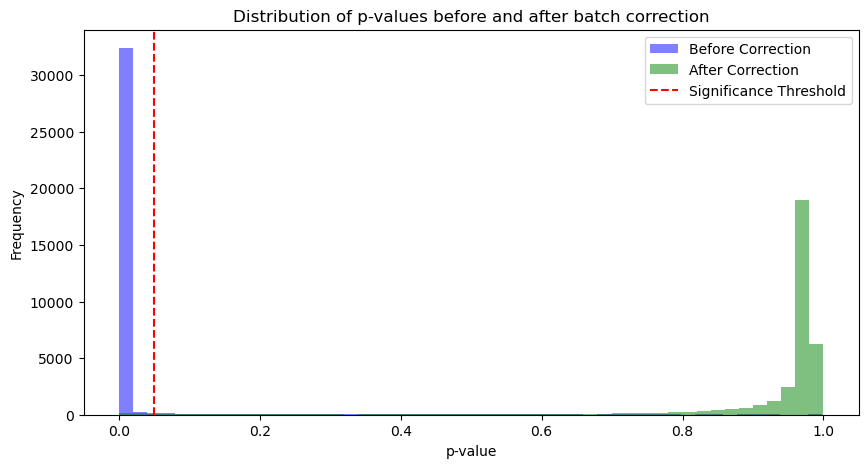

Kolmogorov-Smirnov test p-value: 0.0
Number of significant p-values before correction: 32764
Number of significant p-values after correction: 331


In [44]:
plot_batch_correction_p_values(p_values_before, p_values_after, alpha = 0.05)


In [45]:
p_values_after

array([0.98879581, 0.97596059, 0.89063261, ..., 0.96534277, 0.9520591 ,
       0.97547714])

## Getting all the experiments p_values


In [46]:
import itertools


In [47]:
expriments_pvalue_before=[]
expriments_pvalue_after=[]
combination_list = []
ks_stats =  []

for experiment_1, experiment_2 in itertools.combinations(experiment_list, 2):
    c = f"{experiment_1}-{experiment_2}"
    combination_list.append(c)
    print(c)
    #print("get_p_values_before_after")
    p_values_before, p_values_after = get_p_values_before_after(cts_processed.T, data_corrected, experiment_1, experiment_2)
    expriments_pvalue_before.append(p_values_before)
    expriments_pvalue_after.append(p_values_after)
    #print("ks_2samp")
    ks_stat, ks_p_value = ks_2samp(p_values_before, p_values_after)
    ks_stats.append({"combination":f"{experiment_1}-{experiment_2}","ks_stat":ks_stat, "ks_pvalue": ks_p_value})



GSE157585-GSE167186
GSE157585-GSE164471
GSE157585-GSE60590
GSE157585-GSE129643
GSE157585-GSE152558
GSE167186-GSE164471
GSE167186-GSE60590
GSE167186-GSE129643
GSE167186-GSE152558
GSE164471-GSE60590
GSE164471-GSE129643
GSE164471-GSE152558
GSE60590-GSE129643
GSE60590-GSE152558
GSE129643-GSE152558


In [48]:
# Convert lists to arrays
expriments_pvalue_before_array = np.array(expriments_pvalue_before)
expriments_pvalue_after_array = np.array(expriments_pvalue_after)

# Calculate average and standard deviation for p-values before and after
avg_p_values_before = np.mean(expriments_pvalue_before_array, axis=1)
std_p_values_before = np.std(expriments_pvalue_before_array, axis=1)
avg_p_values_after = np.mean(expriments_pvalue_after_array, axis=1)
std_p_values_after = np.std(expriments_pvalue_after_array, axis=1)

# Create DataFrame for KS test results
ks_stats_df = pd.DataFrame(ks_stats)


# Add columns for average and standard deviation of p-values before and after
ks_stats_df["avg_p_values_before"] = avg_p_values_before
ks_stats_df["std_p_values_before"] = std_p_values_before
ks_stats_df["avg_p_values_after"] = avg_p_values_after
ks_stats_df["std_p_values_after"] = std_p_values_after


In [49]:
ks_stats_df.drop(columns=["ks_stat", "ks_pvalue"])

,combination,avg_p_values_before,std_p_values_before,avg_p_values_after,std_p_values_after
0,GSE157585-GSE167186,0.005000,0.053349,0.965550,0.103090
1,GSE157585-GSE164471,0.008895,0.071536,0.931428,0.154067
2,GSE157585-GSE60590,0.024618,0.117357,0.982249,0.062459
3,GSE157585-GSE129643,0.011611,0.082365,0.925592,0.162326
4,GSE157585-GSE152558,0.024742,0.116121,0.930469,0.142781
5,GSE167186-GSE164471,0.038595,0.138163,0.932167,0.154682
6,GSE167186-GSE60590,0.004136,0.048732,0.966390,0.101659
7,GSE167186-GSE129643,0.020515,0.107411,0.925296,0.162945
8,GSE167186-GSE152558,0.020305,0.106510,0.927010,0.145268
9,GSE164471-GSE60590,0.010871,0.077427,0.943654,0.138916


In [50]:
ks_stats_df[ks_stats_df.isna().any(axis=1)]

,combination,ks_stat,ks_pvalue,avg_p_values_before,std_p_values_before,avg_p_values_after,std_p_values_after


In [51]:
ks_stats_df.to_csv(f"ttstat_difference_{technology}_experiments_before_after_recombat.csv")

Heatmap the similarity of the experiments

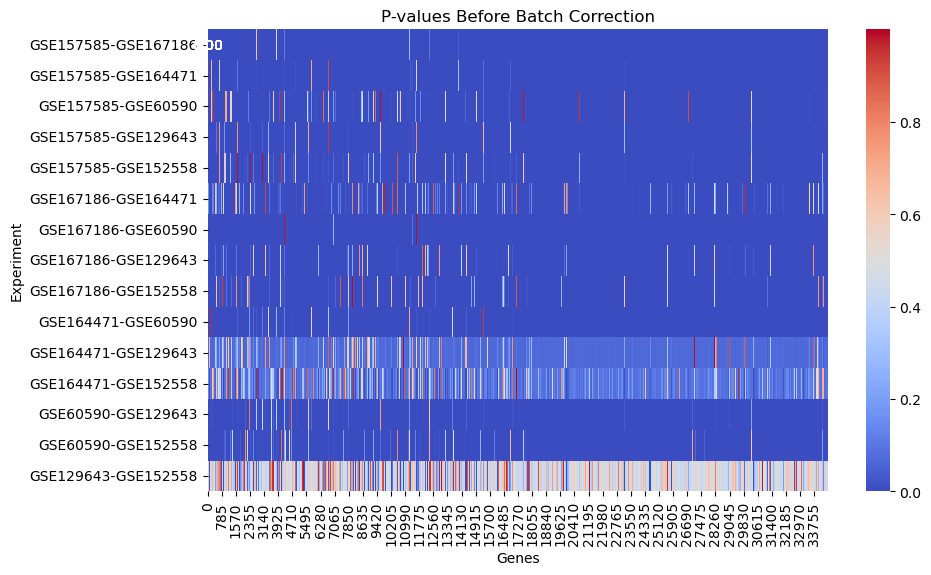

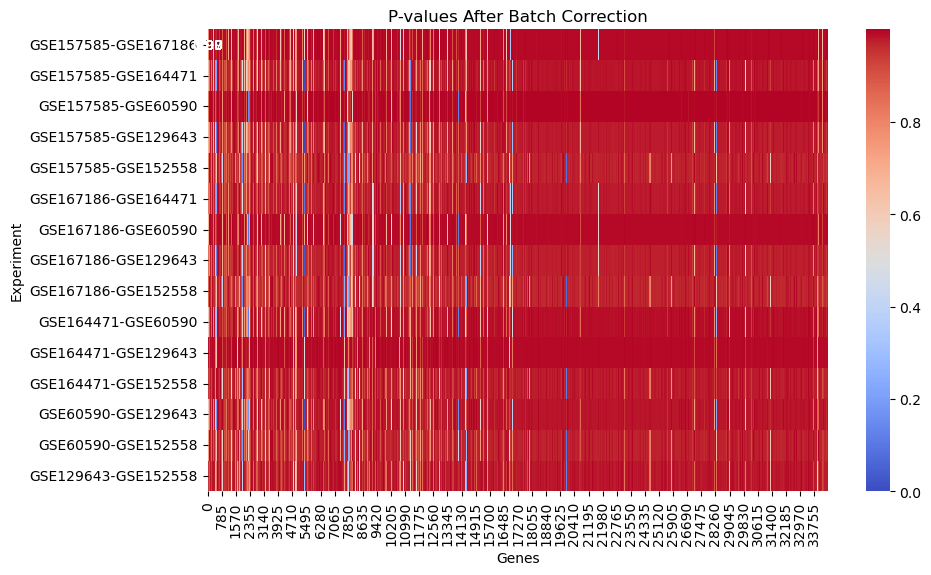

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert lists of p-values to a 2D NumPy array
p_values_before_array = np.array(expriments_pvalue_before)
p_values_after_array = np.array(expriments_pvalue_after)

# Create a heatmap for p-values before batch correction
plt.figure(figsize=(10, 6))
sns.heatmap(p_values_before_array, cmap='coolwarm', annot=True, fmt=".2f", yticklabels=combination_list)
plt.title('P-values Before Batch Correction')
plt.xlabel('Genes')
plt.ylabel('Experiment')
plt.savefig(f"/home/karen/Documents/phd/Plots/expression_distribution_{technology}_reCombatheatmap_before.png")
plt.show()

# Create a heatmap for p-values after batch correction
plt.figure(figsize=(10, 6))
sns.heatmap(p_values_after_array, cmap='coolwarm', annot=True, fmt=".2f", yticklabels=combination_list)
plt.title('P-values After Batch Correction')
plt.xlabel('Genes')
plt.ylabel('Experiment')
plt.savefig(f"/home/karen/Documents/phd/Plots/expression_distribution_{technology}_reCombatheatmap_after.png")
plt.show()

DE only in one experiment

In [53]:
import pandas as pd
experiment=experiment_1

def get_columns_to_keep_one(experiment):
    # Path to the CSV file
    file_path = f'/home/karen/Documents/phd/Data/Expression_data/Differential Expression/{experiment}_DDS.csv'
    
    # Read the CSV file
    de_genes = pd.read_csv(file_path, index_col=0)
    
    # Filter rows based on condition
    filtered_data = de_genes[(abs(de_genes['log2FoldChange']) > 1) & (de_genes['padj'] < 0.1)]
    
    # Extract column names from filtered data
    columns_to_keep = filtered_data["row"].str.strip().tolist()
    return columns_to_keep

# Assuming p_values_before is another DataFrame you want to filter columns from
# Replace p_values_before with your DataFrame name
#filtered_columns = p_values_before[columns_to_keep]

# Now you can work with the filtered columns DataFrame as needed


In [54]:
if technology =="RNAseq":
    columns_to_keep = get_columns_to_keep_one(experiment)

FileNotFoundError: [Errno 2] No such file or directory: '/home/karen/Documents/phd/Data/Expression_data/Differential Expression/GSE129643_DDS.csv'

In [ ]:
if technology =="RNAseq":
    len(columns_to_keep)

In [ ]:
#filter_Bools = [(abs(de_genes['log2FoldChange']) > 1) & (de_genes['padj'] < 0.1)][0]

In [ ]:
#p_values_after[x]

In [ ]:
if technology =="RNAseq":

    DE_data = data.copy()
    DE_data_corrected = data_corrected.copy()
    
    DE_data= DE_data.T
    DE_data = DE_data[columns_to_keep]
    DE_data_corrected = DE_data_corrected[columns_to_keep]
    DE_data= DE_data.T
    
    p_values_before, p_values_after = get_p_values_before_after(DE_data, DE_data_corrected, experiment_1, experiment_2)
    plot_batch_correction_p_values(p_values_before, p_values_after, alpha = 0.05)


In [ ]:
if technology =="RNAseq":
    DE_data_corrected

In [ ]:
if technology =="RNAseq":
    DE_data

In [ ]:
if technology =="RNAseq":
    DE_data.columns

In [ ]:
if technology =="RNAseq":

    
    data_before = data.copy()
    data_before = data_before.T
    
    data_before.reset_index(drop=True, inplace=True)
    
    group_a_samples_before = data_before[cts['Experiment'] == experiment_1]
    
    group_b_samples_before = data_before[cts['Experiment'] == experiment_2]
    group_a_samples_before.columns=data.index
    group_b_samples_before.columns=data.index
    group_a_samples_before = group_a_samples_before[columns_to_keep]
    group_b_samples_before = group_b_samples_before[columns_to_keep]
    _, p_values_before = ttest_ind(group_a_samples_before, group_b_samples_before)
    
    
    data_corrected.reset_index(drop=True, inplace=True)
    
    group_a_samples_corrected = data_corrected[cts['Experiment'] == experiment_1]
    group_b_samples_corrected = data_corrected[cts['Experiment'] == experiment_2]
    
    group_a_samples_corrected.columns=data.index
    group_b_samples_corrected.columns=data.index
    group_a_samples_corrected = group_a_samples_corrected[columns_to_keep]
    group_b_samples_corrected = group_b_samples_corrected[columns_to_keep]
    t_statistic, p_values_after = ttest_ind(group_a_samples_corrected, group_b_samples_corrected)
    plot_batch_correction_p_values(p_values_before, p_values_after, alpha = 0.05)


In [ ]:
import random
if technology =="RNAseq":
    random_values = random.sample(de_genes["row"].tolist(), len(columns_to_keep))


In [ ]:
if technology =="RNAseq":
    
    data_before = data.copy()
    data_before = data_before.T
    
    data_before.reset_index(drop=True, inplace=True)
    
    group_a_samples_before = data_before[cts['Experiment'] == experiment_1]
    
    group_b_samples_before = data_before[cts['Experiment'] == experiment_2]
    group_a_samples_before.columns=data.index
    group_b_samples_before.columns=data.index
    group_a_samples_before = group_a_samples_before[random_values]
    group_b_samples_before = group_b_samples_before[random_values]
    _, p_values_before = ttest_ind(group_a_samples_before, group_b_samples_before)
    
    
    data_corrected.reset_index(drop=True, inplace=True)
    
    group_a_samples_corrected = data_corrected[cts['Experiment'] == experiment_1]
    group_b_samples_corrected = data_corrected[cts['Experiment'] == experiment_2]
    
    group_a_samples_corrected.columns=data.index
    group_b_samples_corrected.columns=data.index
    group_a_samples_corrected = group_a_samples_corrected[random_values]
    group_b_samples_corrected = group_b_samples_corrected[random_values]
    t_statistic, p_values_after = ttest_ind(group_a_samples_corrected, group_b_samples_corrected)
    plot_batch_correction_p_values(p_values_before, p_values_after, alpha = 0.05)

In [ ]:
import pandas as pd
if technology =="RNAseq":
    
    # Path to the CSV file
    file_path_1 = f'/home/karen/Documents/phd/Data/Expression_data/Differential Expression/{experiment_1}_DDS.csv'
    file_path_2 = f'/home/karen/Documents/phd/Data/Expression_data/Differential Expression/{experiment_2}_DDS.csv'
    
    # Read the CSV file
    de_genes_1 = pd.read_csv(file_path_1, index_col=0)
    de_genes_2 = pd.read_csv(file_path_2, index_col=0)
    
    # Filter rows based on condition
    filtered_data_1 = de_genes_1[(abs(de_genes_1['log2FoldChange']) > 1) & (de_genes_1['padj'] < 0.1)]
    filtered_data_2 = de_genes_2[(abs(de_genes_2['log2FoldChange']) > 1) & (de_genes_2['padj'] < 0.1)]
    
    union_filter = pd.concat([filtered_data_1, filtered_data_2]).drop_duplicates()
    intersection_filter = pd.merge(filtered_data_1, filtered_data_2, on='row', how='inner')
    
    # Extract column names from filtered data
    union_keep = union_filter["row"].str.strip().tolist()
    intersection_keep = intersection_filter["row"].str.strip().tolist()


In [ ]:
if technology =="RNAseq":
    
    
    data_before = data.copy()
    data_before = data_before.T
    
    data_before.reset_index(drop=True, inplace=True)
    
    group_a_samples_before = data_before[cts['Experiment'] == experiment_1]
    
    group_b_samples_before = data_before[cts['Experiment'] == experiment_2]
    group_a_samples_before.columns=data.index
    group_b_samples_before.columns=data.index
    group_a_samples_before = group_a_samples_before[intersection_keep]
    group_b_samples_before = group_b_samples_before[intersection_keep]
    _, p_values_before = ttest_ind(group_a_samples_before, group_b_samples_before)
    
    
    data_corrected.reset_index(drop=True, inplace=True)
    
    group_a_samples_corrected = data_corrected[cts['Experiment'] == experiment_1]
    group_b_samples_corrected = data_corrected[cts['Experiment'] == experiment_2]
    
    group_a_samples_corrected.columns=data.index
    group_b_samples_corrected.columns=data.index
    group_a_samples_corrected = group_a_samples_corrected[intersection_keep]
    group_b_samples_corrected = group_b_samples_corrected[intersection_keep]
    t_statistic, p_values_after = ttest_ind(group_a_samples_corrected, group_b_samples_corrected)
    plot_batch_correction_p_values(p_values_before, p_values_after, alpha = 0.05)

Checking the same experiment before and after

In [ ]:
if technology =="RNAseq":
    
    t_statistic, p_values_a = ttest_ind(group_a_samples_before, group_a_samples_corrected)
    t_statistic, p_values_b = ttest_ind(group_b_samples_before, group_b_samples_corrected)
    plot_batch_correction_p_values(p_values_a, p_values_b, alpha = 0.05)

# Cluster data before and after

In [55]:
metadata_short =  pd.DataFrame({
    'Experiment': experiment_order,
    'Age': age_order,
    'Sample': sample_order
})
metadata_short.set_index('Sample', inplace=True)
metadata_short

,Experiment,Age
Sample,,
SRR13388732,GSE164471,Young
SRR13388733,GSE164471,Young
SRR13388734,GSE164471,Young
SRR13388735,GSE164471,Young
SRR13388736,GSE164471,Young
...,...,...
SRR8882198,GSE129643,Young
SRR8882200,GSE129643,Young
SRR8882202,GSE129643,MiddleAge


In [56]:
data_corrected.index = cts["Sample"]
cts_processed.index = cts["Sample"]

In [57]:
adjuested_data_full = pd.concat([data_corrected, metadata_short], axis=1)

In [58]:
unadjested_data_full= pd.concat([cts_processed, metadata_short], axis=1)

In [59]:
adjuested_data_full.columns[10:]

Index(['ENSG00000001460.17', 'ENSG00000001461.16', 'ENSG00000001497.16',
       'ENSG00000001617.11', 'ENSG00000001626.14', 'ENSG00000001629.9',
       'ENSG00000001630.15', 'ENSG00000001631.15', 'ENSG00000002016.17',
       'ENSG00000002079.14',
       ...
       'ENSG00000285471.1', 'ENSG00000285472.1', 'ENSG00000285476.1',
       'ENSG00000285480.1', 'ENSG00000285491.1', 'ENSG00000285505.1',
       'ENSG00000285508.1', 'ENSG00000285509.1', 'Experiment', 'Age'],
      dtype='object', length=34497)

In [60]:
cts_2 = cts.set_index("Sample")
cts_2

,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.11,ENSG00000001167.14,...,ENSG00000285472.1,ENSG00000285476.1,ENSG00000285480.1,ENSG00000285491.1,ENSG00000285505.1,ENSG00000285508.1,ENSG00000285509.1,Experiment,Age,Sample.1
Sample,,,,,,,,,,,,,,,,,,,,,
SRR13388732,3.346531,0.000000,7.023940,0.705439,3.879328,0.275243,7.746350,6.574690,8.136232,3.166290,...,0.311412,0.439481,0.000000,0.000000,0.000000,4.61464,0.142626,GSE164471,23.0,SRR13388732
SRR13388733,7.351350,0.000000,13.916237,4.891812,2.885359,0.190321,16.006573,6.498180,10.725815,7.545120,...,0.000000,0.000000,0.000000,0.000000,0.000000,13.80200,1.119540,GSE164471,28.0,SRR13388733
SRR13388734,7.671751,1.624510,18.720030,3.338030,9.629021,0.204143,19.061782,7.368540,11.420381,6.801920,...,0.000000,0.167163,0.000000,0.418267,0.000000,2.37204,0.915094,GSE164471,31.0,SRR13388734
SRR13388735,2.547355,0.184514,6.876067,0.888782,1.684829,0.000000,3.182537,2.415355,2.242850,1.916299,...,0.000000,0.148800,0.000000,0.000000,0.000000,5.20632,0.813373,GSE164471,31.0,SRR13388735
SRR13388736,15.728966,0.613411,14.120093,3.123864,10.457990,0.198544,12.340000,19.441760,18.223213,3.726510,...,1.544910,1.069550,0.379249,0.000000,0.000000,3.39066,0.707502,GSE164471,35.0,SRR13388736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR8882198,1.832683,0.000000,2.567454,0.617939,1.599221,0.338734,2.457767,1.825564,5.485286,2.604403,...,0.043890,0.109543,0.131619,0.115910,0.023606,1.51306,0.347812,GSE129643,27.0,SRR8882198
SRR8882200,2.251713,0.000000,2.120141,0.895718,2.379145,0.418938,1.489740,2.676330,1.880811,0.663090,...,0.000000,0.156295,0.000000,0.078959,0.000000,1.51426,0.129535,GSE129643,33.0,SRR8882200
SRR8882202,1.387888,0.057285,5.080017,1.439485,1.263484,0.194929,3.880208,2.066827,5.226251,2.951940,...,0.000000,0.000000,0.090303,0.000000,0.000000,2.29948,0.106928,GSE129643,37.0,SRR8882202


In [61]:
adjuested_data_full["Age"]=cts_2["Age"]

adjuested_data_full

,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.11,ENSG00000001167.14,...,ENSG00000285471.1,ENSG00000285472.1,ENSG00000285476.1,ENSG00000285480.1,ENSG00000285491.1,ENSG00000285505.1,ENSG00000285508.1,ENSG00000285509.1,Experiment,Age
Sample,,,,,,,,,,,,,,,,,,,,,
SRR13388732,-0.013507,-0.008613,-0.015782,-0.012606,-0.012512,-0.007849,-0.009428,-0.005869,-0.016109,-0.014609,...,-0.008219,-0.007194,-0.007289,-0.008221,-0.008135,-0.007838,-0.001515,-0.009050,GSE164471,23.0
SRR13388733,-0.020727,-0.036766,0.000817,-0.021617,-0.047792,-0.035041,0.016555,-0.029716,-0.023414,-0.020019,...,-0.036993,-0.035938,-0.036635,-0.035216,-0.035962,-0.035459,0.019047,-0.032990,GSE164471,28.0
SRR13388734,-0.047985,-0.060597,0.019755,-0.059044,-0.034614,-0.066902,0.025750,-0.053573,-0.043942,-0.054922,...,-0.062021,-0.068856,-0.068829,-0.067163,-0.066478,-0.068147,-0.067372,-0.066392,GSE164471,31.0
SRR13388735,0.007692,0.012561,0.004505,0.009135,0.004295,0.011404,-0.003279,0.002127,-0.014221,0.005435,...,0.012142,0.012383,0.012388,0.011679,0.012378,0.012524,0.018481,0.013433,GSE164471,31.0
SRR13388736,0.021639,-0.042779,-0.004353,-0.038308,-0.011563,-0.043566,-0.012129,0.037899,0.019374,-0.051937,...,-0.041170,-0.037522,-0.040471,-0.042044,-0.044774,-0.044207,-0.038909,-0.043675,GSE164471,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR8882198,0.018746,0.028362,-0.000611,0.024016,0.017854,0.027669,0.003543,0.011436,0.004030,0.022221,...,0.028444,0.028495,0.028305,0.027367,0.028665,0.028594,0.022648,0.028368,GSE129643,27.0
SRR8882200,0.031651,0.038879,0.010388,0.035441,0.031588,0.037807,0.013077,0.024175,0.007002,0.030308,...,0.039133,0.038768,0.038781,0.037155,0.038927,0.038838,0.032826,0.038477,GSE129643,33.0
SRR8882202,0.024387,0.034184,0.012162,0.031678,0.023782,0.032860,0.013272,0.018142,0.009680,0.030001,...,0.034194,0.034033,0.033751,0.032730,0.034059,0.034136,0.029831,0.033615,GSE129643,37.0


In [62]:
adjuested_data_full.to_csv(f"/home/karen/Documents/GitHub/Test_DEG_methods-single_cell/batch_correction/{technology}_abundances_adjusted_recombat.csv")

In [ ]:
unadjested_data_full.to_csv(f"/home/karen/Documents/GitHub/Test_DEG_methods-single_cell/batch_correction/{technology}_All_abundances_unadjusted_2_recombat.csv")

Looking at reCombat plotting

In [62]:
X = data_corrected.fillna(0, inplace=False).values 

In [63]:
X

array([[-0.01350724, -0.00861295, -0.01578158, ..., -0.00783757,
        -0.00151509, -0.00905034],
       [-0.02072736, -0.03676626,  0.00081709, ..., -0.03545925,
         0.01904667, -0.03298978],
       [-0.04798518, -0.06059653,  0.01975478, ..., -0.06814743,
        -0.06737225, -0.06639159],
       ...,
       [ 0.02438693,  0.03418388,  0.01216161, ...,  0.03413554,
         0.02983122,  0.03361508],
       [ 0.03146234,  0.04077535,  0.01502427, ...,  0.04069432,
         0.03691152,  0.04036432],
       [ 0.02175596,  0.03141635,  0.00933563, ...,  0.0304994 ,
         0.02131907,  0.03026787]])

In [64]:

# Define a dictionary mapping categories to numerical values
category_map = {category: i for i, category in enumerate(experiment_order)}
if technology =="RNAseq":
    category_map = {'GSE164471': -1, 'GSE152558': 0, 'GSE157585': 1, 'GSE167186':2, "GSE60590":3, "GSE129643":4}
elif technology == "microarray":
    category_map = {'GSE13070':-6, 'GSE47969':-5, 'GSE48278':-4, 'GSE9103':-3, 'GSE59880':-2, 'GSE9676':-1, 'GSE161643':0, 'GSE8157':1, 'GSE1428':2, 'GSE38718':3, 'GSE6348':4, 'GSE40551':5, 'GSE87105':6, 'GSE674_2':7}
# Assuming you have a list called experiment_order which contains the experiment names
# Map the experiment names to numerical values
numeric_experiment_order = [category_map[experiment] for experiment in experiment_order]

from matplotlib.colors import ListedColormap
tab20_colors = plt.cm.tab20.colors
num_colors = len(np.unique(experiment_order))
colors = [tab20_colors[i] for i in range(num_colors)]
custom_cmap = ListedColormap(colors)


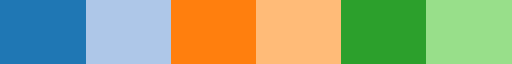

In [65]:
custom_cmap

Using tSNE


In [66]:
from sklearn.manifold import TSNE
X = data_corrected.values 
tSNE=TSNE(n_components=2)
tSNE_result=tSNE.fit_transform(X)
# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
x=tSNE_result[:,0]
y=tSNE_result[:,1]

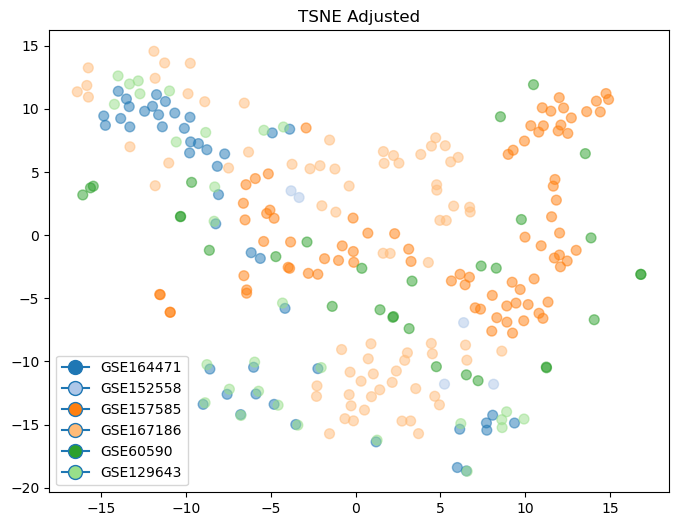

In [67]:

plt.figure(figsize=(8, 6))
plt.scatter(x,y, c=numeric_experiment_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('TSNE Adjusted')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)

# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
save=f"/home/karen/Documents/phd/Plots/TSNE_Scatter_Plot_Experiment_{technology}_reCombat_by_experiment_new_norm.png"
plt.savefig(save)

Using PCA

In [ ]:

# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=numeric_experiment_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('PCA adjusted')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)


# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
save=f"/home/karen/Documents/phd/Plots/PCA_Scatter_Plot_Experiment_{technology}_reCombat_by_experiment.png"
plt.savefig(save)

Lookign at the age

In [68]:



# Define a dictionary mapping categories to numerical values
category_map = {category: i for i, category in enumerate(age_order)}
category_map = {'Young': -1,  'MiddleAge': 0, 'Old': 1}
# Assuming you have a list called experiment_order which contains the experiment names
# Map the experiment names to numerical values
numeric_age_order = [category_map[experiment] for experiment in age_order]
tab20_colors = plt.cm.tab10.colors
num_colors = len(np.unique(age_order))
colors = [tab20_colors[i] for i in range(num_colors)]
custom_cmap = ListedColormap(colors)


In [ ]:
pd.DataFrame(age_order).value_counts()

In [ ]:
custom_cmap

tSNE

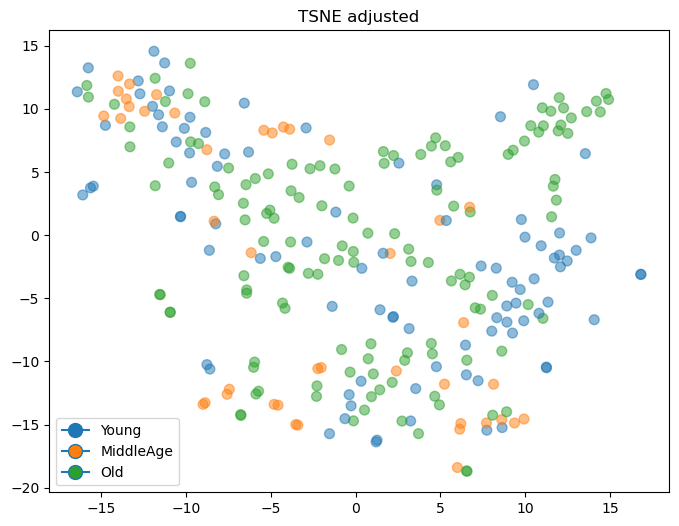

In [69]:

plt.figure(figsize=(8, 6))
plt.scatter(x,y, c=numeric_age_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('TSNE adjusted')

# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
save=f"/home/karen/Documents/phd/Plots/TSNE_Scatter_Plot_Experiment_{technology}_reCombat_by_age.png"
plt.savefig(save)
#plt.savefig("TSNE_Scatter_Plot_Age_reCombat.jpg")

PCA

In [ ]:

# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=numeric_age_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('PCA adjusted')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)


# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
save=f"/home/karen/Documents/phd/Plots/PCA_Scatter_Plot_Experiment_{technology}_reCombat_by_age.png"
plt.savefig(save)
# plt.savefig("PCA_Scatter_Plot_Age_reCombat.jpg")

# Unadjusted

In [ ]:
X = cts_processed.values 


tSNE by experiment

In [ ]:

tSNE=TSNE(n_components=2)
tSNE_result=tSNE.fit_transform(X)
# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
x=tSNE_result[:,0]
y=tSNE_result[:,1]

In [ ]:
# Define a dictionary mapping categories to numerical values
category_map = {category: i for i, category in enumerate(experiment_order)}
if technology =="RNAseq":
    category_map = {'GSE164471': -1, 'GSE152558': 0, 'GSE157585': 1, 'GSE167186':2, "GSE60590":3, "GSE129643":4}
elif technology == "microarray":
    category_map = {'GSE13070':-6, 'GSE47969':-5, 'GSE48278':-4, 'GSE9103':-3, 'GSE59880':-2, 'GSE9676':-1, 'GSE161643':0, 'GSE8157':1, 'GSE1428':2, 'GSE38718':3, 'GSE6348':4, 'GSE40551':5, 'GSE87105':6, 'GSE674_2':7}
# Assuming you have a list called experiment_order which contains the experiment names
# Map the experiment names to numerical values
numeric_experiment_order = [category_map[experiment] for experiment in experiment_order]

from matplotlib.colors import ListedColormap
tab20_colors = plt.cm.tab20.colors
num_colors = len(np.unique(experiment_order))
colors = [tab20_colors[i ] for i in range(num_colors)]
custom_cmap = ListedColormap(colors)

In [ ]:

plt.figure(figsize=(8, 6))
plt.scatter(x,y, c=numeric_experiment_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('TSNE Original')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)

# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
save=f"/home/karen/Documents/phd/Plots/TSNE_Scatter_Plot_Experiment_{technology}_Original_by_experiment_reCombat_new_norm.png"
plt.savefig(save)
#plt.savefig("TSNE_Scatter_Plot_Experiment_Original.jpg")

PCA by experiment original

In [ ]:

# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=numeric_experiment_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('PCA Original')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)


# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
save=f"/home/karen/Documents/phd/Plots/PCA_Scatter_Plot_Experiment_{technology}_Original_by_experiment_reCombat.png"
plt.savefig(save)
#plt.savefig("PCA_Scatter_Plot_Experiment_Original.jpg")

By age

In [ ]:

# Define a dictionary mapping categories to numerical values
category_map = {category: i for i, category in enumerate(age_order)}
category_map = {'Young': -1,  'MiddleAge': 0, 'Old': 1}
# Assuming you have a list called experiment_order which contains the experiment names
# Map the experiment names to numerical values
numeric_age_order = [category_map[experiment] for experiment in age_order]
tab20_colors = plt.cm.tab10.colors
num_colors = len(np.unique(age_order))
colors = [tab20_colors[i % 20] for i in range(num_colors)]
custom_cmap = ListedColormap(colors)

TSNE by age

In [ ]:


# Step 3: Visualize the clusters
# Plot the first two principal components and color them according to the assigned clusters
plt.figure(figsize=(8, 6))
plt.scatter(x,y, c=numeric_age_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('TSNE Original by age')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)


# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
save=f"/home/karen/Documents/phd/Plots/TSNE_Scatter_Plot_Experiment_{technology}_Original_by_age_reCombat.png"
plt.savefig(save)
#plt.savefig("TSNE_Scatter_Plot_Age_Original.jpg")

PCA by age original

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=numeric_age_order, cmap=custom_cmap, s=50, alpha=0.5)
plt.title('PCA Orignal by age')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.colorbar(label="Experiment", spacing ="uniform",  values=numeric_experiment_order)


# Create legend with experiment names
legend_handles = [plt.Line2D([0], [0], marker='o',  markerfacecolor=color, markersize=10, label=f'Experiment {i+1}') for i, color in enumerate(colors)]
plt.legend(handles=legend_handles, labels=list(category_map.keys()), loc='best')

#plt.legend(list(category_map.keys()))
#plt.show()
save=f"/home/karen/Documents/phd/Plots/PCA_Scatter_Plot_Experiment_{technology}_Original_by_age_reCombat.png"
plt.savefig(save)
#plt.savefig("PCA_Scatter_Plot_Age_Original.jpg")

UMAP